### MS AAI 500 Final Project Week 5 Data Processing

In [1]:
import data_fix as dfix
import data_utils_g1 as du
import matplotlib.pyplot as plt
dfix.init()
data = dfix.scrub_txt_file()

Replacing all special characters for clean read
Asking for cleaned data file save location
Printing save location:
/Users/Arcpolar/Documents/GitHub/2022-msaai-500-final-project/data/blutest1.txt
/Users/Arcpolar/Documents/GitHub/2022-msaai-500-final-project/data/blutest1_final.csv


In [2]:
data

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Turbo,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,,186005,6,Automatic,Front-Rear,4-5,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,EQUINOX,2011,Jeep,No,Petrol,3,,192000,6,Tiptronic,Front-Rear,4-5,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,,200000,4,Variator,Front,4-5,Right-hand drive,Black,2
3,45769185,3607,862,FORD,ESCAPE,2011,Jeep,Yes,Hybrid,2.5,,168966,4,Automatic,Front-Rear,4-5,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,,91901,4,Automatic,Front,4-5,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,Turbo,300000,4,Manual,Rear,2-3,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,SONATA,2011,Sedan,Yes,Petrol,2.4,,161600,4,Tiptronic,Front,4-5,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,TUCSON,2010,Jeep,Yes,Diesel,2,,116365,4,Automatic,Front,4-5,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,CAPTIVA,2007,Jeep,Yes,Diesel,2,,51258,4,Automatic,Front,4-5,Left wheel,Black,4


In [3]:
print(data.Category.unique())

['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']


In [135]:
data_types = {}
data_types['Price'] = 'int32'
data = data.astype(data_types)
categoryarray = data.Category.unique()
pricemeanarray = []
pricesdarray = []
df2 = data.query("Category == 'Jeep'")
price = df2['Price']
for x in categoryarray:
    comm = "Category == '"+x+"'"
    df2 = data.query(comm)
    price = df2['Price']
    mean = price.mean()
    sd = price.std()
    pricemeanarray.append(round(mean,2))
    pricesdarray.append(round(sd,2))
print(pricemeanarray)
print(pricesdarray)
print(categoryarray)

[23684.29, 11381.25, 14231.55, 18550.93, 122916.18, 25253.7, 21250.41, 20531.22, 24583.69, 11534.45, 28805.27]
[25314.28, 9076.91, 14372.43, 13638.08, 1722822.9, 47756.68, 28625.94, 13804.82, 22604.55, 12487.62, 28789.08]
['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']


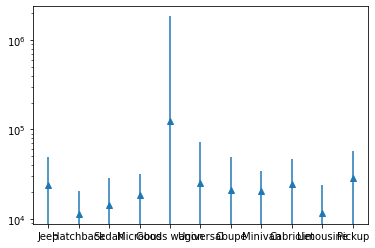

In [125]:
fig, ax = plt.subplots()
ax.errorbar(categoryarray, pricemeanarray, pricesdarray, linestyle='None', marker='^')
ax.set_yscale('log')
#ax.scatter(categoryarray,pricemeanarray)

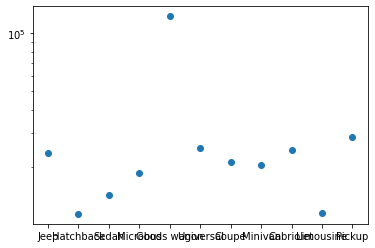

In [96]:
fig, ax = plt.subplots()
ax.scatter(categoryarray,pricemeanarray)
ax.set_yscale('log')

[ 1  9  2  3  7  6  0  8  5 10  4]


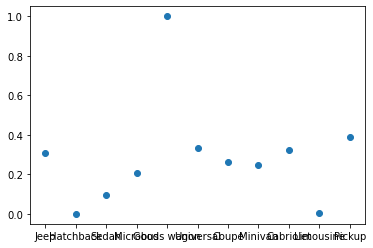

In [136]:
import numpy as np
pricemeansortarray = np.argsort(pricemeanarray)
print(pricemeansortarray)
pricemeanarrayln = np.log(pricemeanarray)
minimean = pricemeanarrayln.min()
unitstep = (pricemeanarrayln.max()-pricemeanarrayln.min())/1000
pricemeanarraynormal = (pricemeanarrayln - minimean)/unitstep/1000
#pricemeansortarray = pricemeanarray.sort()
fig, ax = plt.subplots()
ax.scatter(categoryarray,pricemeanarraynormal)

In [119]:
j = len(categoryarray)
i = 0
for i in range(j):
    print(categoryarray[i], "normallization number is ", pricemeanarraynormal[i])
    i = i+1

Jeep normallization number is  0.3079780599792654
Hatchback normallization number is  0.0
Sedan normallization number is  0.09392340493746233
Microbus normallization number is  0.2053143059216948
Goods wagon normallization number is  1.0
Universal normallization number is  0.33494160951177987
Coupe normallization number is  0.26240791630064475
Minivan normallization number is  0.2479389006787977
Cabriolet normallization number is  0.32364130913667355
Limousine normallization number is  0.005619141052235945
Pickup normallization number is  0.3902405040526792
